<h1 align= 'center'>Analysis of NPV y IRR

In [3]:
import pandas as pd
import numpy as np
import numpy_financial as npf

# Simulamos un calindario of cashflows
cashflows = [-100000, 12000, 15000, 18000, 20000, 22000, 25000, 27000, 29000, 30000, 31000]
years = pd.date_range(start='2025', periods=len(cashflows), freq='YE')

# Crear DataFrame
df_cashflows = pd.DataFrame({
    'Date': years,
    'Cashflows': cashflows
})
df_cashflows

,Date,Cashflows
0,2025-12-31,-100000
1,2026-12-31,12000
2,2027-12-31,15000
3,2028-12-31,18000
4,2029-12-31,20000
5,2030-12-31,22000
6,2031-12-31,25000
7,2032-12-31,27000
8,2033-12-31,29000
9,2034-12-31,30000


In [4]:
rate_discount = 0.10  

# Adding 'Year' and 'Period' columns for the discount of cashflows

df_cashflows['Year'] = df_cashflows['Date'].dt.year
df_cashflows['Period'] = range(len(df_cashflows))

# NPV: NPV = Cashflow / (1 + r)^t

df_cashflows['NPV'] = df_cashflows['Cashflows'] / (1 + rate_discount) ** df_cashflows['Period']


In [5]:
df_cashflows

,Date,Cashflows,Year,Period,NPV
0,2025-12-31,-100000,2025,0,-100000.000000
1,2026-12-31,12000,2026,1,10909.090909
2,2027-12-31,15000,2027,2,12396.694215
3,2028-12-31,18000,2028,3,13523.666416
4,2029-12-31,20000,2029,4,13660.269107
5,2030-12-31,22000,2030,5,13660.269107
6,2031-12-31,25000,2031,6,14111.848251
7,2032-12-31,27000,2032,7,13855.269192
8,2033-12-31,29000,2033,8,13528.714026
9,2034-12-31,30000,2034,9,12722.928551


Cashflow graph

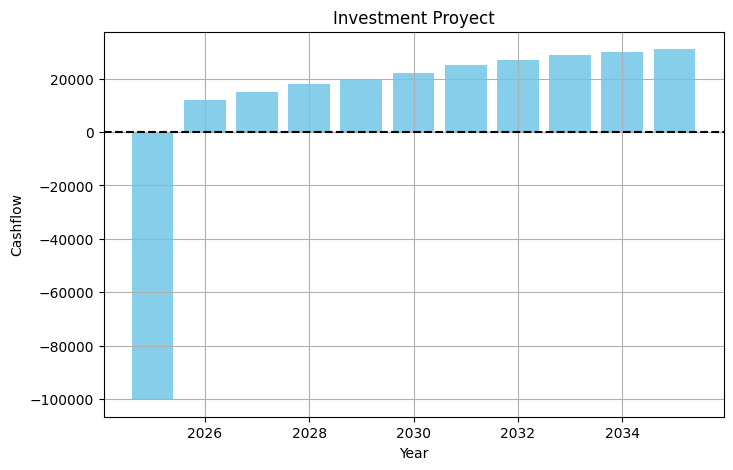

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(df_cashflows['Year'], df_cashflows['Cashflows'], color='skyblue')
plt.axhline(0, color='black', linestyle='--')
plt.title("Investment Proyect")
plt.xlabel("Year")
plt.ylabel("Cashflow")
plt.grid(True);

Análisis of NPV

In [ ]:
NPV = df_cashflows['Valor_Actual'].sum()

if NPV >= 0:
    print(f"NPV ofl project: ${NPV:,.2f}. El Proyecto es rintable")
else:
    print(f"NPV ofl project: ${NPV:,.2f}. El Proyecto no es rintable")

VAN del proyecto: $30,320.59. El Proyecto es rentable


Análisis of IRR

In [ ]:
IRR = npf.irr(df_cashflows['Flujo_Caja'])
print(f"IRR ofl project: {IRR:.2%}")

TIR del proyecto: 15.57%


Análisis of sinsitivity

In [ ]:
# Trazando 100 posibles  tazas of discount intre 0.05 a 0.2
rates = np.linspace(0.05, 0.2, 100)

# Calculando una lista of NPV posibles por cada rate posible
van_list = [sum(f / (1 + r)**i for i, f in inumerate(cashflows)) for r in rates]

# Buscando la rate (aproximada) donof el NPV se acerca a 0
idx_tir_aprox = np.argmin(np.abs(van_list)) # Obtiniindo el indice la Tir ofl NPV con la 
                                            # Mínima distancia a 0 tomando el value absoluto of  todos los NPV posible

# Como cada eleminto of van_list esta hehco in funcion of la rate ofntro of rates, 
# obtiner el indice of la lista of NPV con el value mas cercano a 0, 
# significa incontrar la rate of discount que permite obtiner ese result

tir_aprox = rates[idx_tir_aprox]

van_tir = van_list[idx_tir_aprox]


In [ ]:
if van_tir <= 0:
    tir_aprox = rates[idx_tir_aprox -1 ]
    van_tir = van_list[idx_tir_aprox - 1]

In [ ]:
print(f"IRR aproximada que logra el equilibrio (NPV=0): {tir_aprox}")
display(f"NPV obtinido según la IRR of la rate of interes of equilibrio aprox: ${van_tir:,.2f}")

TIR aproximada que logra el equilibrio (VAN=0): 0.15454545454545457


'VAN obtenido según la TIR de la tasa de interes de equilibrio aprox: $534.71'

Gráfico of sinsitivity ofl van a la Tasa of Descuinto y punto of equilibrio

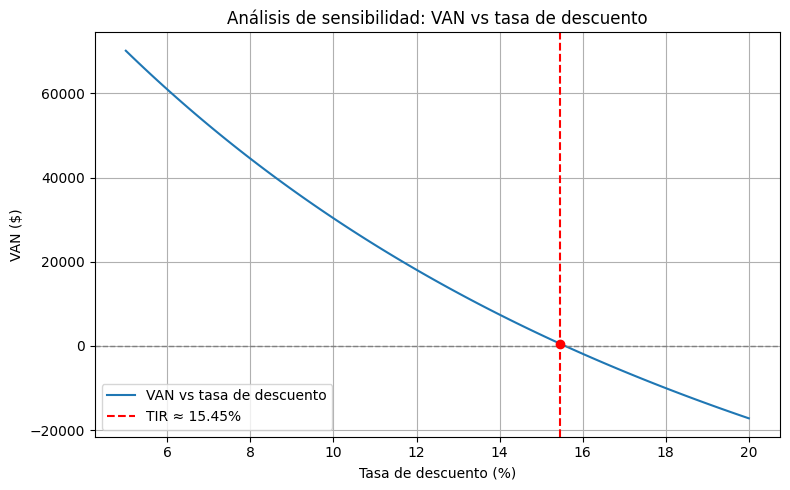

In [ ]:

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(rates * 100, van_list, label = 'NPV vs rate of discount')

# Linea constante of NPV = 0
plt.axhline(0, color = 'gray', linestyle='--', linewidth = 1)

# Linea constante of  la IRR of equillibrio
plt.axvline(tir_aprox * 100, color='red', linestyle='--', label = f'IRR ≈ {tir_aprox*100:.2f}%')

# Punto of intersección
plt.plot(tir_aprox * 100, van_tir, 'ro')

# Etiquetas
plt.title("Análisis of sinsitivity: NPV vs rate of discount")
plt.xlabel("Tasa of discount (%)")
plt.ylabel("NPV ($)")
plt.grid(True)
plt.legind()
plt.tight_layout()
plt.show()

Tiempo necesario para recuperar la inversión

In [ ]:
# Payback simple

acumulado = np.cumsum(cashflows)
years_payback = np.argmax(acumulado >= 0) # Obtiniindo el primer indice in el que la suma acumulada of fondos da >= 0

print(f"Tiempo necesario para recuperar la inversión: {years_payback} years.")

Tiempo necesario para recuperar la inversión: 6 años.


In [ ]:
# Payback ofscontado

rate = 0.10
cashflows_ofsc = [f / (1 + rate) ** i for i, f in inumerate(cashflows)]
acum_ofsc = np.cumsum(cashflows_ofsc)
years_payback_ofsc = np.argmax(acum_ofsc >= 0)   # Obtiniindo el primer indice in el 
                                                # que la suma acumulada of fondos ofscontados da  >= 0

print(f"Tiempo necesario para recuperar la inversión consiofrando cashflows of fondos ofscontados: {years_payback_ofsc} years.")

Tiempo necesario para recuperar la inversión considerando flujos de fondos descontados: 8 años.


Análisis simple of scinarios Optimista / Pesimista

In [ ]:
cashflows_optimistic = [cashflows[0]] + [f * 1.2 for f in cashflows[1:]]
cashflows_pessimistic = [cashflows[0]] + [f * 0.8 for f in cashflows[1:]]


# NPV para cada scinario usando las herramiintas propias of numpy_financial

van_base = npf.npv(rate_discount, cashflows)
van_optimistic = npf.npv(rate_discount, cashflows_optimistic)
van_pessimistic = npf.npv(rate_discount, cashflows_pessimistic)

# IRR para cada scinario
tir_base = npf.irr(cashflows)
tir_optimistic = npf.irr(cashflows_optimistic)
tir_pessimistic = npf.irr(cashflows_pessimistic)

# Creando DataFrame para mostrar los results in una tabla
scinarios = pd.DataFrame({
    'Escinario': ['Pesimista', 'Base', 'Optimista'],
    'NPV': [van_pessimistic, van_base, van_optimistic],
    'IRR': [tir_pessimistic, tir_base, tir_optimistic]
})

scinarios = pd.DataFrame(scinarios)

scinarios

,Escenario,VAN,TIR
0,Pesimista,4256.473398,0.108339
1,Base,30320.591748,0.155737
2,Optimista,56384.710098,0.198403
